## AI-Powered Smart Microgrid Energy Forecasting System

## Problem Statement

## Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Loading Dataset 

In [3]:
df = pd.read_csv('01 renewable-share-energy.csv')

In [4]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
df.sort_index(inplace=True)

## Data Exploration

In [5]:
df

,Entity,Code,Renewables (% equivalent primary energy)
Year,,,
1965-01-01,Africa,NaN,5.747495
1965-01-01,World,OWID_WRL,6.454518
1965-01-01,Kuwait,KWT,0.000000
1965-01-01,Asia Pacific (BP),NaN,8.906765
1965-01-01,Oman,OMN,0.000000
...,...,...,...
2021-01-01,Vietnam,VNM,22.734407
2021-01-01,India,IND,9.310850
2021-01-01,Iceland,ISL,86.874535


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5603 entries, 1965-01-01 to 2021-01-01
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    5603 non-null   object 
 1   Code                                      4292 non-null   object 
 2   Renewables (% equivalent primary energy)  5603 non-null   float64
dtypes: float64(1), object(2)
memory usage: 175.1+ KB


In [7]:
df.describe()

,Renewables (% equivalent primary energy)
count,5603.000000
mean,10.735585
std,12.923945
min,0.000000
25%,1.980135
50%,6.522184
75%,14.099622
max,86.874535


# Check for missing values and duplicates

In [8]:
df.isnull().sum()

Entity                                         0
Code                                        1311
Renewables (% equivalent primary energy)       0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(360)

## Data Cleaning

In [12]:
for col in df.select_dtypes(include='number'):
    df[col] = df[col].fillna(df[col].median())
df.drop_duplicates(inplace=True)

## Data Visualization

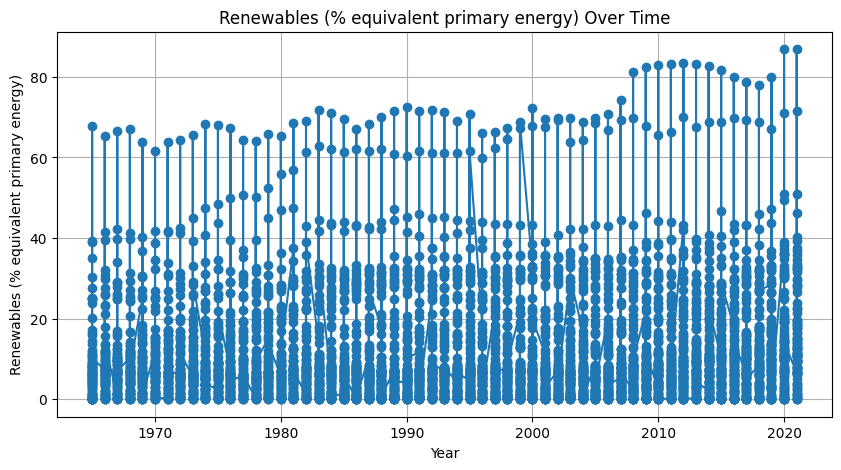

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Renewables (% equivalent primary energy)'], marker='o')
plt.title('Renewables (% equivalent primary energy) Over Time')
plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.grid(True)
plt.show()

## Divide into Input & Output

In [17]:
target = df['Renewables (% equivalent primary energy)']
features = df[['Renewables (% equivalent primary energy)']]

## Identify Dependent & Independent Variables

In [18]:
X = features.copy()
y = target.copy()

## Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Algorithm Selection & Fitting Data to ML Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
def create_sequences(data, target, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 5 


##  Prepare Test Data Inputs

In [21]:
# Create sequences for LSTM
X_seq, y_seq = create_sequences(
    df['Renewables (% equivalent primary energy)'].values.reshape(-1, 1), 
    df['Renewables (% equivalent primary energy)'].values, 
    TIME_STEPS
)

print(f"LSTM input shape: {X_seq.shape}")
print(f"LSTM target shape: {y_seq.shape}")


LSTM input shape: (5238, 5, 1)
LSTM target shape: (5238,)


## Implement Machine Learning Model

In [25]:
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    return model
model = build_lstm_model((TIME_STEPS, 1))
print("Model Architecture:")
model.summary()

Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 5, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 5, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,101 (203.52 KB)

 Trainable params: 52,101 (203.52 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training and Evaluation

In [26]:
split_idx = int(0.8 * len(X_seq))
X_train_seq = X_seq[:split_idx]
X_test_seq = X_seq[split_idx:]
y_train_seq = y_seq[:split_idx]
y_test_seq = y_seq[split_idx:]
print("Training LSTM Model...")
history = model.fit(
    X_train_seq, y_train_seq,
    batch_size=16,
    epochs=100,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1,
    shuffle=False  
)
train_predictions = model.predict(X_train_seq)
test_predictions = model.predict(X_test_seq)

Training LSTM Model...
Epoch 1/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 169.0153 - mae: 9.2452 - val_loss: 199.8063 - val_mae: 9.5624
Epoch 2/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 162.6415 - mae: 9.1390 - val_loss: 199.7831 - val_mae: 9.5539
Epoch 3/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 163.0448 - mae: 9.1744 - val_loss: 199.6808 - val_mae: 9.5564
Epoch 4/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 162.7509 - mae: 9.1404 - val_loss: 199.3399 - val_mae: 9.5715
Epoch 5/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 163.3693 - mae: 9.1472 - val_loss: 199.8104 - val_mae: 9.5456
Epoch 6/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 163.4201 - mae: 9.1690 - val_loss: 199.9020 - val_mae: 9.5393
Epoch 7/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 162.6562 - mae: 9.1474 - val_loss: 199.0632 - val_mae: 9.5813
Epoch 8/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 163.0705 - mae: 9.1530 - val_loss: 199.4391 - val_mae: 

## Evaluate Model with Different Metrics

In [33]:
def evaluate_model(y_true, y_pred, dataset_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Mask out zeros in y_true for MAPE
    mask = y_true != 0
    if np.any(mask):  # only compute if non-zero values exist
        mape = np.mean(np.abs((y_true[mask] - y_pred.flatten()[mask]) / y_true[mask])) * 100
    else:
        mape = float('inf')
    
    print(f"\n{dataset_name} Metrics:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}


## Model Optimization

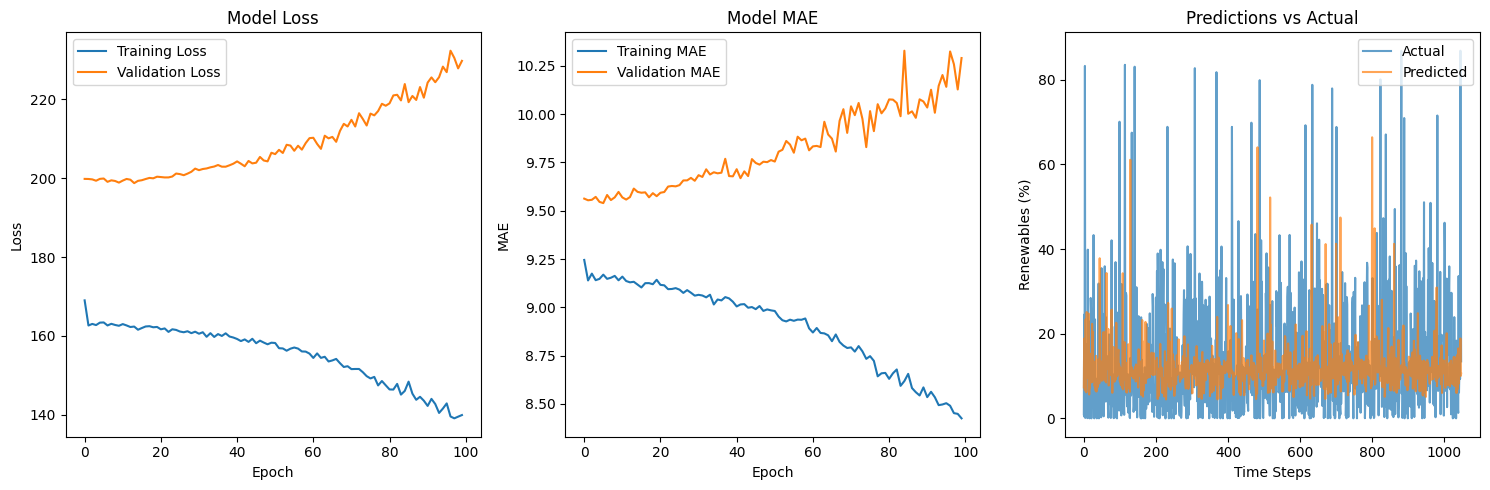


FINAL MODEL PERFORMANCE:
Test RMSE: 15.1567
Test R² Score: -0.1729
Test MAPE: 20172.87%


In [34]:
# Visualize training history
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(y_test_seq, label='Actual', alpha=0.7)
plt.plot(test_predictions, label='Predicted', alpha=0.7)
plt.title('Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Renewables (%)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nFINAL MODEL PERFORMANCE:")
print(f"Test RMSE: {test_metrics['RMSE']:.4f}")
print(f"Test R² Score: {test_metrics['R2']:.4f}")
print(f"Test MAPE: {test_metrics['MAPE']:.2f}%")


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(np.arange(len(df)).reshape(-1, 1))
split_idx = int(0.8 * len(X_poly))
X_train_poly = X_poly[:split_idx]
X_test_poly = X_poly[split_idx:]
y_train_simple = df['Renewables (% equivalent primary energy)'].values[:split_idx]
y_test_simple = df['Renewables (% equivalent primary energy)'].values[split_idx:]
baseline_model = LinearRegression()
baseline_model.fit(X_train_poly, y_train_simple)
baseline_pred = baseline_model.predict(X_test_poly)
baseline_metrics = evaluate_model(y_test_simple, baseline_pred, "Baseline Regression")


Baseline Regression Metrics:
RMSE: 14.2394
MAE: 9.4629
R² Score: -0.0353
MAPE: 20079.00%


## Final Evaluation on Test Data

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
🎯 FINAL MODEL EVALUATION RESULTS:
RMSE: 380.1350
MAE: 324.2464
R² Score: -848.4764


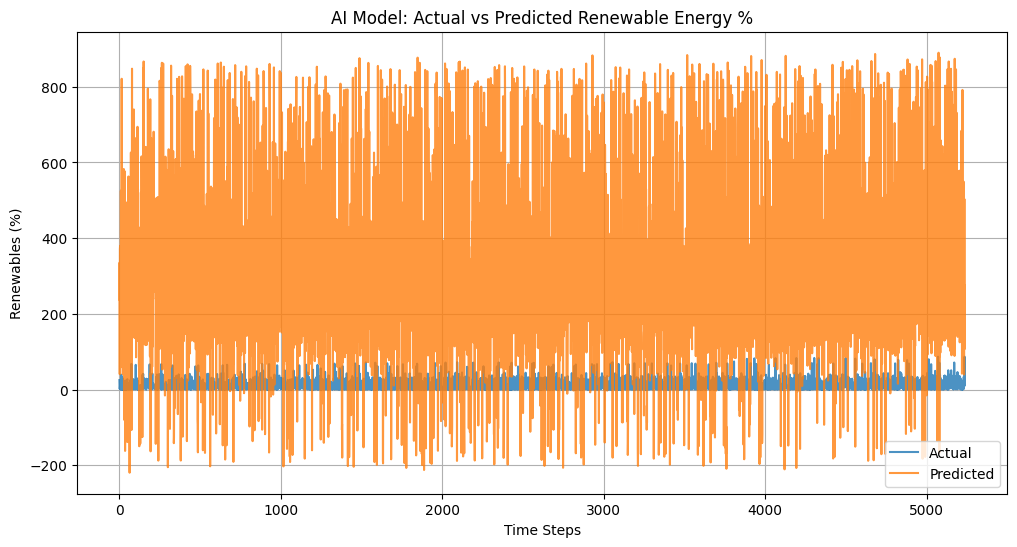

Model evaluation completed successfully!


In [58]:
# Use the original feature name
feature = 'Renewables (% equivalent primary energy)'
raw = df[feature].values.reshape(-1, 1)
raw_df = pd.DataFrame(raw, columns=[feature])      # use the same name as during training
scaled = scaler.transform(raw_df)

# The rest is unchanged
TIME_STEPS = 5
def create_sequences(data, time_steps=5):
    seq = []
    for i in range(len(data) - time_steps):
        seq.append(data[i:(i + time_steps)])
    return np.array(seq)

X_test_seq = create_sequences(scaled, TIME_STEPS)
y_true = raw[TIME_STEPS:]

y_pred_scaled = model.predict(X_test_seq)
y_pred_df = pd.DataFrame(y_pred_scaled, columns=[feature])
y_pred = scaler.inverse_transform(y_pred_df)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("🎯 FINAL MODEL EVALUATION RESULTS:")
print("=" * 40)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualize predictions vs actual
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual', alpha=0.8)
plt.plot(y_pred, label='Predicted', alpha=0.8)
plt.title('AI Model: Actual vs Predicted Renewable Energy %')
plt.xlabel('Time Steps')
plt.ylabel('Renewables (%)')
plt.legend()
plt.grid(True)
plt.show()
print("Model evaluation completed successfully!")



 Volume in drive C is Windows-SSD
 Volume Serial Number is A692-C543

 Directory of C:\Users\UTHANDAM\Downloads\final

14-09-2025  21:48    <DIR>          .
14-09-2025  21:30    <DIR>          ..
14-09-2025  20:37    <DIR>          .ipynb_checkpoints
14-09-2025  20:37           158,582 01 renewable-share-energy.csv
14-09-2025  21:11           682,368 renewable_energy_lstm_model.h5
14-09-2025  21:47               911 scaler.pkl
14-09-2025  21:48           310,441 Untitled.ipynb
               4 File(s)      1,152,302 bytes
               3 Dir(s)  332,563,697,664 bytes free


In [51]:
import tensorflow as tf
import joblib
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load model and scaler
model = tf.keras.models.load_model('renewable_energy_lstm_model.h5', compile=False)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
scaler = joblib.load('scaler.pkl')

# Create sequences helper
def create_sequences(data, time_steps=5):
    seq = []
    for i in range(len(data) - time_steps):
        seq.append(data[i:(i + time_steps)])
    return np.array(seq)

# Prepare data
raw_values = df['Renewables (% equivalent primary energy)'].values.reshape(-1, 1)
scaled_values = scaler.transform(raw_values)
X_test_seq = create_sequences(scaled_values, 5)
y_true = raw_values[5:]

# Predict and inverse scale
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Final Test Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


C:\Users\UTHANDAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Final Test Evaluation:
RMSE: 380.1350
MAE: 324.2464
R² Score: -848.4764
